# Build the Variational Auto encoder, required for downsampling of image + adding conditional probabilities

Idea: do a downsampling of the image to a smaller format but by keeping all information.

How to keep all information?
This is what the autoencoder has to do, by doing down and up sampling though a convolutional MLP. Weights are learned for the output to match as good as possibly the input.

There is a second trick: by adding text encodings, the VAE is transformed into conditional VAE.

I.e. the probabilities computed for the output are p(output|input, context).

Lets take a model that was already trained fot this task and re-training a couple of epochs on our dataset!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


Original image shape is  (218, 178, 3)


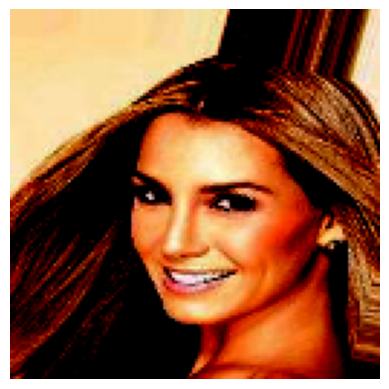

In [2]:
from data_loading.image_utils import load_image, show_image
import albumentations as A
from albumentations.pytorch import ToTensorV2

img_size = 128

img = load_image("000001.jpg")

img = img.transpose(1, 2, 0)  # CHW → HWC
assert img.ndim == 3 and img.shape[2] == 3

print("Original image shape is ", img.shape)
transform = A.Compose([
    A.Resize(img_size, img_size),
    A.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    ),
    ToTensorV2()
])
# apparrently, the model expects values  in the interval [-1, 1]
transformed = transform(image=img)["image"]

